In [1]:
data =  "Downloads/Data/final_project_dataset_modified.pkl"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

In [4]:
dataset = pd.read_pickle(data)

In [5]:
#Remove Outliers
dataset.pop("TOTAL", 0)

0

In [6]:
def featureFormat(dictionary, features, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = False):
    """ convert dictionary to numpy array of features
        remove_NaN = True will convert "NaN" string to 0.0
        remove_all_zeroes = True will omit any data points for which
            all the features you seek are 0.0
        remove_any_zeroes = True will omit any data points for which
            any of the features you seek are 0.0
        sort_keys = True sorts keys by alphabetical order. Setting the value as
            a string opens the corresponding pickle file with a preset key
            order (this is used for Python 3 compatibility, and sort_keys
            should be left as False for the course mini-projects).
        NOTE: first feature is assumed to be 'poi' and is not checked for
            removal for zero or missing values.
    """


    return_list = []

    # Key order - first branch is for Python 3 compatibility on mini-projects,
    # second branch is for compatibility on final project.
    if isinstance(sort_keys, str):
        import pickle
        keys = pickle.load(open(sort_keys, "rb"))
    elif sort_keys:
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()

    for key in keys:
        tmp_list = []
        for feature in features:
            try:
                dictionary[key][feature]
            except KeyError:
                print("error: key ", feature, " not present")
                return
            value = dictionary[key][feature]
            if value=="NaN" and remove_NaN:
                value = 0
            tmp_list.append( float(value) )

        # Logic for deciding whether or not to add the data point.
        append = True
        # exclude 'poi' class as criteria.
        if features[0] == 'poi':
            test_list = tmp_list[1:]
        else:
            test_list = tmp_list
        ### if all features are zero and you want to remove
        ### data points that are all zero, do that here
        if remove_all_zeroes:
            append = False
            for item in test_list:
                if item != 0 and item != "NaN":
                    append = True
                    break
        ### if any features for a given data point are zero
        ### and you want to remove data points with any zeroes,
        ### handle that here
        if remove_any_zeroes:
            if 0 in test_list or "NaN" in test_list:
                append = False
        ### Append the data point if flagged for addition.
        if append:
            return_list.append( np.array(tmp_list) )

    return np.array(return_list)

In [7]:
def targetFeatureSplit(dataset):
    """ 
        given a numpy array like the one returned from
        featureFormat, separate out the first feature
        and put it into its own list (this should be the 
        quantity you want to predict)

        return targets and features as separate lists

        (sklearn can generally handle both lists and numpy arrays as 
        input formats when training/predicting)
    """

    target = []
    features = []
    for item in dataset:
        target.append( item[0] )
        features.append( item[1:] )

    return target, features

In [8]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data1 = featureFormat(dataset, features_list )
poi, finance_features = targetFeatureSplit(data1)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
finance_features = scl.fit_transform(finance_features)
features_test = np.array([[200000., 1000000.]])
print(scl.transform(features_test))

[[0.1885135  0.03250335]]


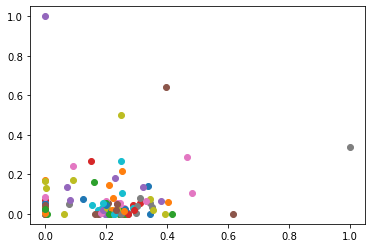

In [10]:
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

In [11]:
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

from sklearn.cluster import KMeans
cls = KMeans(n_clusters=2)
pred = cls.fit(finance_features).predict(finance_features)

In [ ]:
### renaming the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("no predictions object named pred found, no clusters to plot")